# Causal discovery methods based on constrained functional causal models

### LiNGAM-based Methods
Estimation of Linear, Non-Gaussian Acyclic Model from observed data. It assumes non-Gaussianity of the noise terms in the causal model.

In [ ]:
#pip install causal-learn
import causallearn

In [1]:
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import networkx as nx
import graphviz

#### Generating a data set (Ground truth)

**Data set:** First, we generate a causal structure with 7 variables. Then we create a dataset with 6 variables from x0 to x5, with x6 being the latent variable for x2 and x3.

In [11]:
sample_size = 100

np.random.seed(1000)

x6 = np.random.uniform(size=sample_size)
x3 = 2.0*x6 + np.random.uniform(size=sample_size)
x0 = 0.5*x3 + np.random.uniform(size=sample_size)
x2 = 2.0*x6 + np.random.uniform(size=sample_size)
x1 = 0.5*x0 + 0.5*x2 + np.random.uniform(size=sample_size)
x5 = 0.5*x0 + np.random.uniform(size=sample_size)
x4 = 0.5*x0 - 0.5*x2 + np.random.uniform(size=sample_size)

X = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5, x6]).T, columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6'])

X.head()

,x0,x1,x2,x3,x4,x5,x6
0,1.580933,1.778676,1.681310,1.401489,0.323556,0.939695,0.653590
1,1.535818,1.500808,0.640261,1.151626,1.364111,1.240120,0.115007
2,1.327622,1.866804,2.333161,1.973610,0.198548,1.516844,0.950283
3,1.862436,1.771370,1.469047,1.893800,0.455695,1.575680,0.482191
4,2.129621,2.323514,2.497079,2.461964,-0.106248,1.246922,0.872475


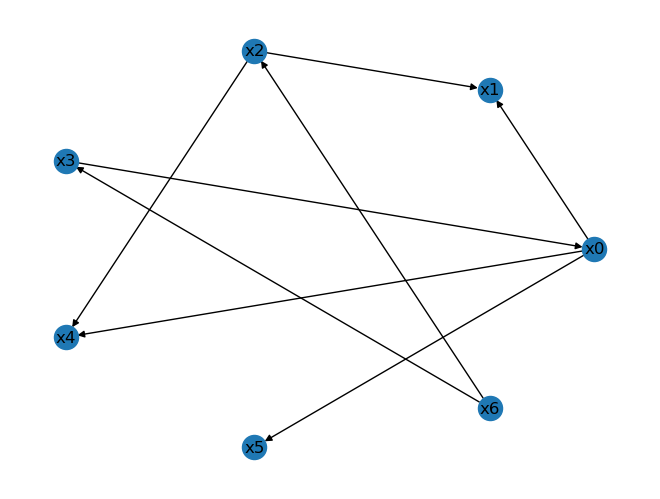

In [12]:
m = np.array([[0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0],
              [0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0],
              [0.5, 0.0,-0.5, 0.0, 0.0, 0.0, 0.0],
              [0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

G = nx.DiGraph(m.T)

pos = nx.circular_layout(G)

labeldict = {i:c for i,c in enumerate(X.columns)}
nx.draw(G, pos, labels=labeldict, with_labels=True)

#### ICA-based LiNGAM
Parameters
- random_state: int, optional (default=None). The seed used by the random number generator.
- max_iter: int, optional (default=1000). The maximum number of iterations of FastICA.
- X: array-like, shape (n_samples, n_features). Training data, where n_samples is the number of samples and n_features is the number of features.

Returns
- model.causal_order_: array-like, shape (n_features). The causal order of fitted model, where n_features is the number of features.
- model.adjacency_matrix_: array-like, shape (n_features, n_features). The adjacency matrix B of fitted model, where n_features is the number of features.

In [13]:
from causallearn.search.FCMBased import lingam
model = lingam.ICALiNGAM(random_state = 11, max_iter = 1000)
model.fit(X)

print(model.causal_order_)
print(model.adjacency_matrix_)

[6, 3, 0, 5, 2, 1, 4]
[[ 0.          0.          0.          0.5161612   0.          0.
   0.        ]
 [ 0.49176318  0.          0.54884047  0.          0.          0.
   0.        ]
 [ 0.19876562  0.          0.          0.          0.          0.
   1.841746  ]
 [ 0.          0.          0.          0.          0.          0.
   2.09709923]
 [ 0.5333921   0.         -0.53449275  0.          0.          0.
   0.        ]
 [ 0.41492709  0.          0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.        ]]


/Users/rena/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


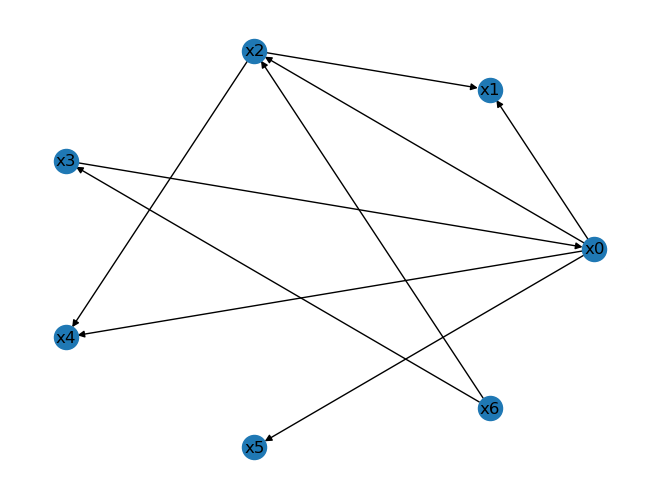

In [14]:
G = nx.DiGraph(model.adjacency_matrix_.T)

pos = nx.circular_layout(G)

labeldict = {i:c for i,c in enumerate(X.columns)}
nx.draw(G, pos, labels=labeldict, with_labels=True)

<div class="alert alert-block alert-warning">
Task 1: What would have happened if our dataset had fewer number of samples? (Hint: try sample size of 1000 and check how the results change.)
</div>

In [ ]:
# Answer: With a smaller sample size, the algorithm might have less data to learn from, 
#potentially leading to less accurate estimation of causal relationships between variables. 
#In the context of LiNGAM, which is used for estimating causal relationships in observational data, 
#having a larger sample size generally improves the reliability of the results.

#### Census Income Data Set
Dataset from: https://archive.ics.uci.edu/ml/datasets/census+income

This is the same dataset used for Lab 2 when you tried PC and GES methods. 

In [15]:
df = pickle.load( open( "df_causal_discovery.p", "rb" ) )

data = np.array(df)

df.head()

,age,hours-per-week,hasGraduateDegree,inRelationship,isWhite,isFemale,greaterThan50k
0,39,40,0,0,1,0,0
1,50,13,0,1,1,0,0
2,38,40,0,0,1,0,0
3,53,40,0,1,0,0,0
5,37,40,1,0,1,1,0


<div class="alert alert-block alert-warning">
Task 2: Discover causal relations using ICALiNGAM method. Do you think the results are better than PC or GES? Explain why do you think it is the case?
</div>

Causal-learn has implementations for a set of LiNGAM-based methods which you can try yourself, e.g., DirectLiNGAM, VAR-LiNGAM.
https://causal-learn.readthedocs.io/en/latest/search_methods_index/Causal%20discovery%20methods%20based%20on%20constrained%20functional%20causal%20models/lingam.html


/Users/rena/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


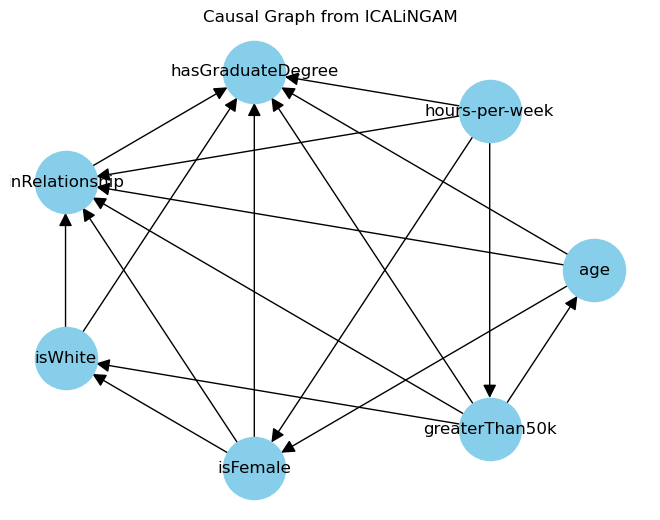

In [4]:
import pandas as pd
import numpy as np
import pickle
from causallearn.search.FCMBased import lingam
import networkx as nx
import matplotlib.pyplot as plt
import graphviz

# Load the data
df = pickle.load(open("df_causal_discovery.p", "rb"))
data = np.array(df)

# Get variable names from the dataframe columns
variable_names = df.columns.tolist()

model = lingam.ICALiNGAM(random_state=11, max_iter=1000)
model.fit(data)

# Create a directed graph from the adjacency matrix
G = nx.DiGraph(model.adjacency_matrix_)

# Map node indices to variable names
node_labels = {i: variable_names[i] for i in range(len(variable_names))}

# Draw the graph with variable names
pos = nx.circular_layout(G)
nx.draw(G, pos, labels=node_labels, with_labels=True, font_weight='normal', arrowsize=20, node_color='skyblue', node_size=2000)
plt.title("Causal Graph from ICALiNGAM")
plt.show()


In [6]:
#Looking at the results of the three methods, the ges performed best, then pc then lingam. 
#PC and GES make certain assumptions about the underlying causal structure of the data, which is effective in this case in causal discovery. 
#ICALiNGAM relaxes some of the assumptions made by other methods, which can be advantageous in capturing more complex causal relationships, 
#and assumes latent variables.
#But in this case, I think there need to be more constraints, for example there are a lot of edges on the skeleton in the lingam method.
#Maybe there are confounding factors, and this method is closer to the truth but the DAG is not meaningful to us.
#Is causal discovery always so messy or is this a bad dataset?